In [1]:
import heapq
import matplotlib.pyplot as plt
import time
import math
import pandas as pd

In [2]:
class Node:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

In [3]:
def huffman_encoding(symbols, frequencies):
    heap = []
    for s, f in zip(symbols, frequencies):
        heapq.heappush(heap, Node(s, f))

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    root = heap[0]
    codes = {}

    def generate_codes(node, current_code=""):
        if node is None:
            return
        if node.symbol is not None:
            codes[node.symbol] = current_code
            return
        generate_codes(node.left, current_code + "0")
        generate_codes(node.right, current_code + "1")

    generate_codes(root)
    return codes

In [6]:
def run_experiment():
    ns = [100, 500, 1000, 2000, 5000, 10000]   # Larger input sizes
    experimental = []
    theoretical = []

    for n in ns:
        symbols = [chr(65 + i % 26) for i in range(n)]
        frequencies = [i + 1 for i in range(n)]

        start = time.time()
        huffman_encoding(symbols, frequencies)
        end = time.time()

        experimental.append(end - start)
        theoretical.append(n * math.log(n, 2))  # O(n log n)

    exp_min, exp_max = min(experimental), max(experimental)
    theo_min, theo_max = min(theoretical), max(theoretical)

    exp_norm = [(x - exp_min) / (exp_max - exp_min) for x in experimental]
    theo_norm = [(x - theo_min) / (theo_max - theo_min) for x in theoretical]

    # Create DataFrame
    df = pd.DataFrame({
        'n': ns,
        'Experimental (sec)': experimental,
        'Theoretical (n log n)': theoretical,
        'Experimental (Norm)': exp_norm,
        'Theoretical (Norm)': theo_norm
    })

    # Display results
    print("===== OUTPUT NUMERICAL DATA (UN-NORMALISED) =====")
    print(df[['n', 'Experimental (sec)', 'Theoretical (n log n)']], "\n")

    print("===== OUTPUT NUMERICAL DATA (NORMALISED) =====")
    print(df[['n', 'Experimental (Norm)', 'Theoretical (Norm)']], "\n")

    # ------------------------------------------
    # Graph 1 - Unnormalized
    # ------------------------------------------
    plt.figure(figsize=(8,5))
    plt.plot(df['n'], df['Experimental (sec)'], 'bo-', label='Experimental (sec)')
    plt.plot(df['n'], df['Theoretical (n log n)'], 'ro-', label='Theoretical (n log n)')
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time / Operations")
    plt.title("Huffman Coding - Unnormalized")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ------------------------------------------
    # Graph 2 - Normalized
    # ------------------------------------------
    plt.figure(figsize=(8,5))
    plt.plot(df['n'], df['Experimental (Norm)'], 'bo-', label='Experimental (Normalized)')
    plt.plot(df['n'], df['Theoretical (Norm)'], 'ro-', label='Theoretical (Normalized)')
    plt.xlabel("Input Size (n)")
    plt.ylabel("Normalized Value")
    plt.title("Huffman Coding - Normalized")
    plt.legend()
    plt.grid(True)
    plt.show()

    return df

===== OUTPUT NUMERICAL DATA (UN-NORMALISED) =====
       n  Experimental (sec)  Theoretical (n log n)
0    100            0.000319             664.385619
1    500            0.004357            4482.892142
2   1000            0.003207            9965.784285
3   2000            0.006359           21931.568569
4   5000            0.018346           61438.561898
5  10000            0.045732          132877.123795 

===== OUTPUT NUMERICAL DATA (NORMALISED) =====
       n  Experimental (Norm)  Theoretical (Norm)
0    100             0.000000            0.000000
1    500             0.088914            0.028882
2   1000             0.063588            0.070352
3   2000             0.133003            0.160856
4   5000             0.396951            0.459670
5  10000             1.000000            1.000000 



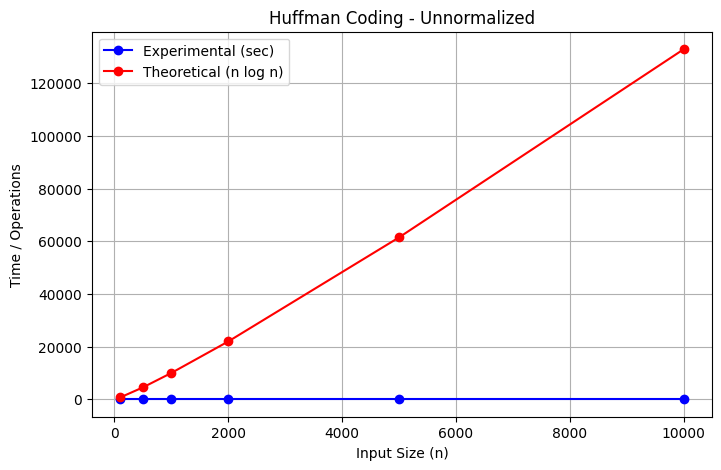

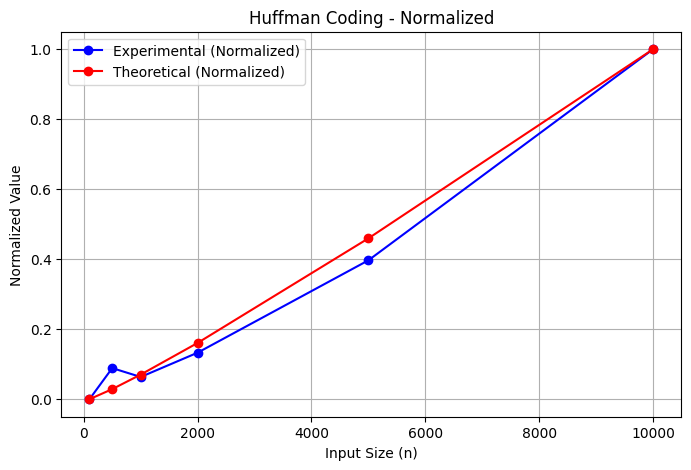

In [7]:
df_results = run_experiment()